### GOAL

Simulate data 

### TODO
- develop ecDNA simulation workflow
- simulate simple excisions
- simulate simple SV (small DEL, INV) from 2 to 9 fragments
- simulate intra-chromosomal multi-region including INV
- simulate inter-chromosomal multi-region including INV
- simulate all above allowing segmental duplication


In [35]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import main as m
import simulate as s

### 1. Simulate simple excision

```
conf = {N:1,
        NEIGHBOR:False,
        SINGLE_CHR:True,
        WEIGHT_CHR: [50,50],
        P_DEL_LEFT: 0,
        P_DEL_RIGHT: 0,
        P_INVERT: 0,
        P_DUP: 0
       }
```

In [16]:
m.simulate_simple_excisions(s.CHRLEN, s.CHRRANGES)

### 2. Simulate simple events (small deletions)

```
conf = {N:1,
        NEIGHBOR:True,
        SINGLE_CHR:True,
        WEIGHT_CHR: [50,50],
        P_DEL_LEFT: 60,
        P_DEL_RIGHT: 60,
        P_INVERT: 0,
        P_DUP: 0
       }
```

In [21]:
m.simulate_simple_deletions(s.CHRLEN,s.CHRRANGES)

### 3. Simulate simple inversion 

```
conf = {N:1,
        NEIGHBOR:True,
        SINGLE_CHR:True,
        WEIGHT_CHR: [50,50],
        P_DEL_LEFT: 0,
        P_DEL_RIGHT: 0,
        P_INVERT: 40,
        P_DUP: 0
       }
```

In [22]:
m.simulate_simple_inversion(s.CHRLEN, s.CHRRANGES)

### 4. Simulate simple inversion and deletions

```
conf = {N:1,
        NEIGHBOR:True,
        SINGLE_CHR:True,
        WEIGHT_CHR: [50,50],
        P_DEL_LEFT: 60,
        P_DEL_RIGHT: 60,
        P_INVERT: 40,
        P_DUP: 0
       }
```

In [30]:
m.simulate_simple_mix(s.CHRLEN, s.CHRRANGES)

### 5. Simulate intra-chromosomal multi-region including INV

```
conf = {N:1,
        NEIGHBOR:False,
        SINGLE_CHR:True,
        WEIGHT_CHR: [50,50],
        P_DEL_LEFT: 60,
        P_DEL_RIGHT: 60,
        P_INVERT: 40,
        P_DUP: 0
       }
```

In [32]:
m.simulate_intrachrom_multi_region_random(s.CHRLEN, s.CHRRANGES)
m.simulate_intrachrom_multi_region_pseudorandom(s.CHRLEN, s.CHRRANGES)

### 6. Simulate inter-chromosomal multi-region including INV (pseudorandom)

```
conf = {N:1,
        NEIGHBOR:False,
        SINGLE_CHR:False,
        WEIGHT_CHR: [50,50],
        P_DEL_LEFT: 60,
        P_DEL_RIGHT: 60,
        P_INVERT: 40,
        P_DUP: 0
       }
```

In [34]:
m.simulate_interchr_multi_regions(s.CHRLEN, s.CHRRANGES)

### 7. Simulate foldbacks 

```
conf = {N:1,
        NEIGHBOR:False,
        SINGLE_CHR:True,
        WEIGHT_CHR: [50,50],
        P_DEL_LEFT: 60,
        P_DEL_RIGHT: 60,
        P_INVERT: 40,
        P_DUP: 0,
        P_FOLDBACK: 40
       }
```

In [6]:
m.simulate_foldbacks(s.CHRLEN, s.CHRRANGES)

### 8. Simulate spectrum

In [15]:
import simulate as s

# SMALL_DEL_POS = 0
# DUP_POS = 1
# INV_POS = 2
# INTERCHR_POS = 3
# MULTI_REGION_POS = 4
# FOLDBACK_POS = 5

s.generate_conformation()

577


In [31]:
# N_FRAG_POS = 0
# FRAG_LEN_POS = 1
# SMALL_DEL_POS = 2
# DUP_POS = 3
# INV_POS = 4
# INTERCHR_POS = 5
# MULTI_REGION_POS = 6
# FOLDBACK_POS = 7
# RETURN_POS = 8

# m.simulate_structure(s.CHRLEN, s.CHRRANGES, specify_conformation=[5,0,1,1,1,1,1,1,0])
m.simulate_structure(s.CHRLEN, s.CHRRANGES, specify_conformation=None)

#Simulation templates  2631


### 8.1 Plot ecDNA template conformation

In [18]:
# correct missing small_del information
import os
import json
import pandas as pd
df_dtype = {"count_frag": int, 
            "foldback": int, 
            "dup": int,
            "inv": int,
            "interchr": int, 
            "multi_region": int,
            "topology":str}


df = pd.read_csv("sim_all/summary.txt",header=0,sep="\t",dtype=df_dtype)
df["small_del"] = 0

for i in range(0,df.shape[0]):
    simid = df.iloc[i,0]
    batchid = df.iloc[i,1]
    # print(simid)
    fpath = os.path.join("sim_all",batchid,"""{}.json""".format(simid))
    # print(fpath)
    with open(fpath, "r") as f:
        data = json.load(f)
        if data["accept_criteria"][2] == 1:
            df.iloc[i,9] = 1
            
df.to_csv("sim_all/summary_corrected.txt",header=True,index=False,sep="\t")

In [2]:
import pandas as pd
df_dtype = {"count_frag": int, 
            "foldback": int, 
            "dup": int,
            "inv": int,
            "interchr": int, 
            "multi_region": int,
            "topology":str}

df = pd.read_csv("sim_all/summary_corrected.txt",header=0,sep="\t", dtype=df_dtype)
# sim_id	batch_id	count_frag	dup	inv	interchr	multi_region	foldback	topology	small_dell
df = df[["#sim_id","count_frag","small_del", "dup","inv","interchr","multi_region","foldback"]]

df["multi_fragment"] = 0
df.loc[df['count_frag'] > 1, 'multi_fragment'] = 1
# df.loc[df['small_del'] > 1, 'small_del'] = 1
df.loc[df['inv'] > 0, 'inv'] = 1
df.loc[df['dup'] > 0, 'dup'] = 1
df.loc[df['interchr'] > 0, 'interchr'] = 1
df.loc[df['multi_region'] > 0, 'multi_region'] = 1
df.loc[df['count_frag'] > 1, 'count_frag'] = 0
df.loc[df['foldback'] > 0, 'foldback'] = 1
df.head(10)

,#sim_id,count_frag,small_del,dup,inv,interchr,multi_region,foldback,multi_fragment
0,sim_1,1,0,0,0,0,0,0,0
1,sim_2,1,0,0,0,0,0,0,0
2,sim_3,1,0,0,0,0,0,0,0
3,sim_4,1,0,0,0,0,0,0,0
4,sim_5,1,0,0,0,0,0,0,0
5,sim_6,0,0,0,0,0,0,0,1
6,sim_7,0,0,0,0,0,0,0,1
7,sim_8,0,0,0,0,0,0,0,1
8,sim_9,0,0,0,0,0,0,0,1
9,sim_10,0,0,0,0,0,0,0,1


In [4]:
%reload_ext rpy2.ipython

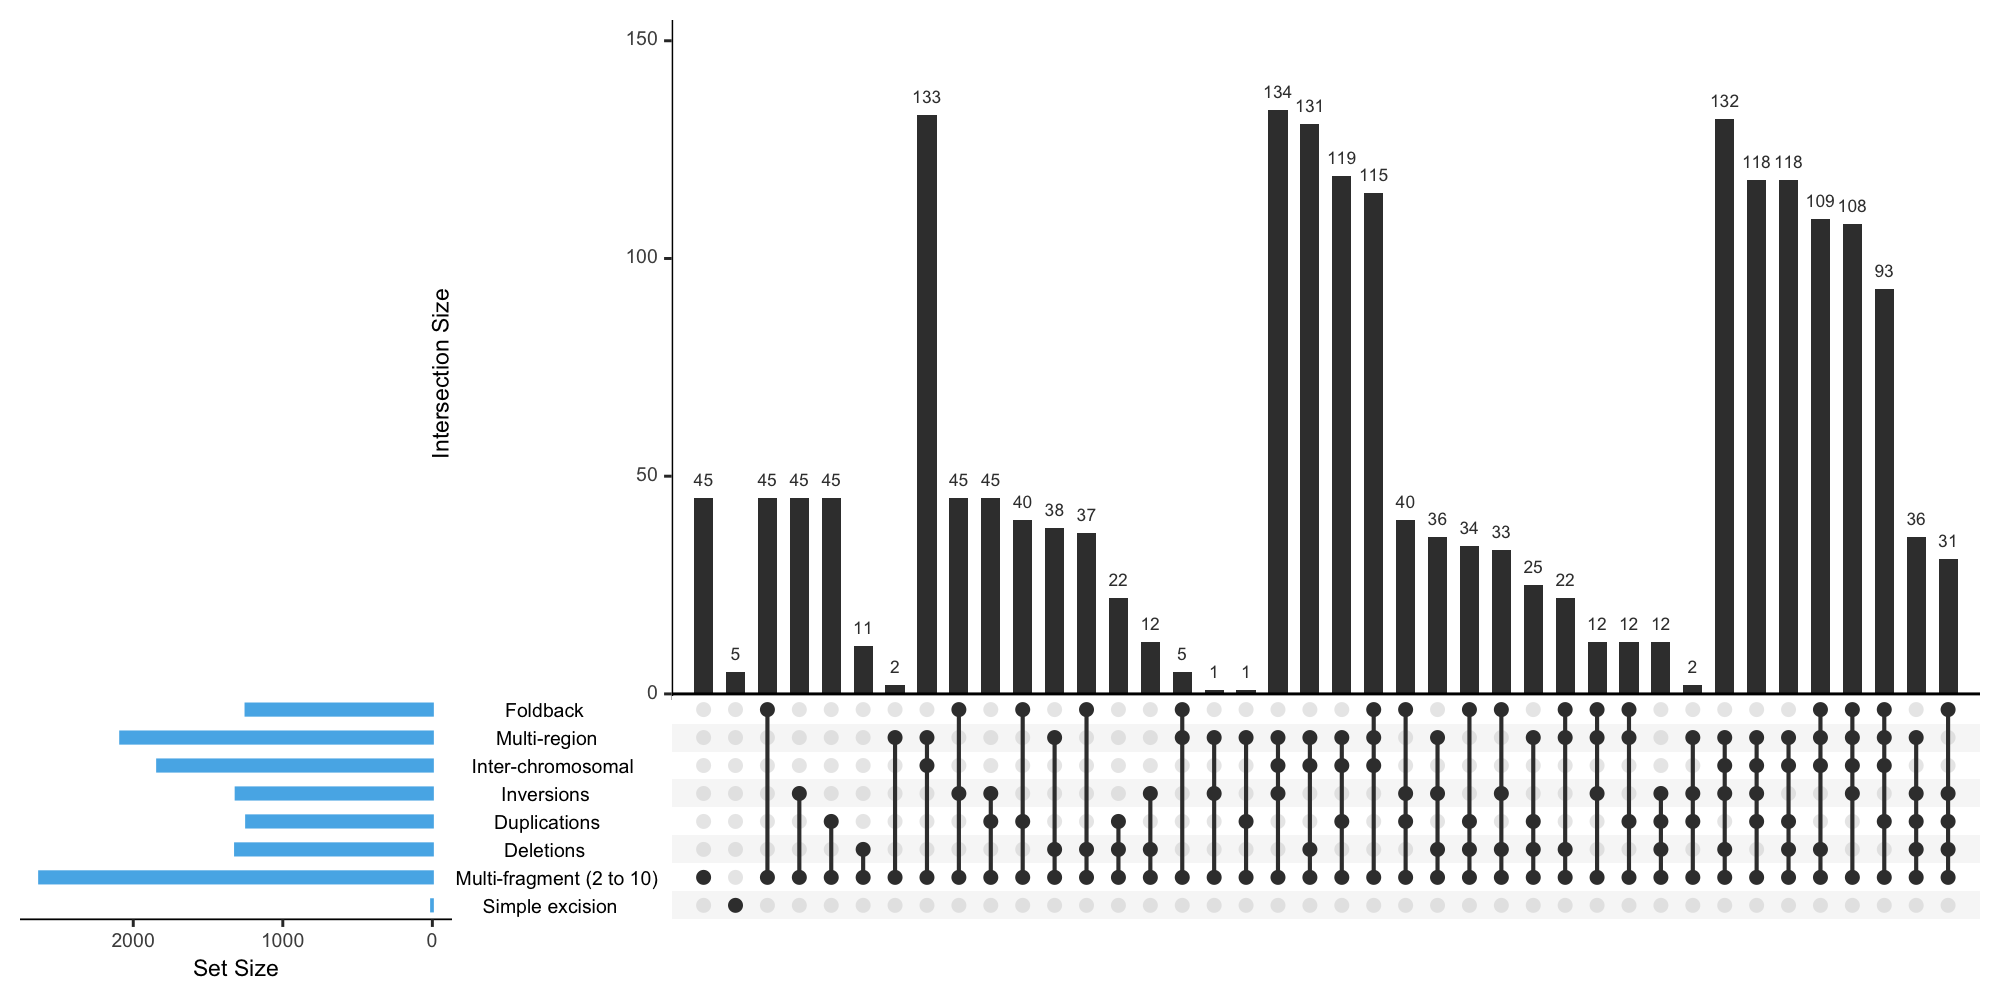

In [10]:
%%R -i df -w 10 -h 5 --units in -r 200

library(ggplot2)
library(UpSetR)


colnames(df) <- c("sim", "Simple excision", "Deletions", "Duplications", "Inversions", "Inter-chromosomal", "Multi-region", "Foldback", "Multi-fragment (2 to 10)")
df <- df[,c("Simple excision", "Multi-fragment (2 to 10)", "Deletions", "Duplications", "Inversions", "Inter-chromosomal", "Multi-region", "Foldback")]

cols <- c("sim", "Simple excision", "Deletions", "Duplications", "Inversions", "Inter-chromosomal", "Multi-region", "Foldback", "Multi-fragment (2 to 10)")
rows <- c("Simple excision", "Multi-fragment (2 to 10)", "Deletions", "Duplications", "Inversions", "Inter-chromosomal", "Multi-region", "Foldback")

for 

upset(df, 
      sets =rows, 
      sets.bar.color = "#56B4E9", keep.order = T)
      # order.by="freq")


In [16]:
# annotate by classes 
import pandas as pd

df_dtype = {"count_frag": int, 
            "foldback": int, 
            "dup": int,
            "inv": int,
            "interchr": int, 
            "multi_region": int,
            "topology":str}


# sim_id	batch_id	count_frag	dup	inv	interchr	multi_region	foldback	topology	small_dell
df = pd.read_csv("sim_all/summary_corrected.txt",header=0,sep="\t", dtype=df_dtype)

df["multi_fragment"] = 0
df.loc[df['count_frag'] > 1, 'multi_fragment'] = 1
# df.loc[df['small_del'] > 1, 'small_del'] = 1
df.loc[df['inv'] > 0, 'inv'] = 1
df.loc[df['dup'] > 0, 'dup'] = 1
df.loc[df['interchr'] > 0, 'interchr'] = 1
df.loc[df['multi_region'] > 0, 'multi_region'] = 1
# df.loc[df['count_frag'] > 1, 'count_frag'] = 0
df.loc[df['foldback'] > 0, 'foldback'] = 1

# range 11 12 13 14 15 16 17
df["Simple excision"] = 0
df["Simple events"] = 0
df["Mixed simple events"] = 0
df["Multi-region intra-chromosomal"] = 0
df["Multi-region inter-chromosomal"] = 0
df["Simple duplications"] = 0
df["Foldbacks"] = 0
df["Others"] = 0
df["Order"] = 0

offset_pos = 10
df_class = {1:"Simple excision",
           2:"Simple events",
           3:"Mixed simple events",
           4:"Multi-region intra-chromosomal",
           5:"Multi-region inter-chromosomal",
           6:"Simple duplications",
           7:"Foldbacks",
           8:"Others"}

for i in range(0, df.shape[0]):
    _, _, _, _dup, _inv, _interchr, _multireg, _foldback, _ = [int(s) for s in df.iloc[i,8]]
    _frags = df.iloc[i,2]
    _del = df.iloc[i,9]
    to_set = 8
    
    # simple excision
    if _frags == 1 and _del == 0 and _dup == 0 and _inv == 0 and _interchr == 0 and _multireg == 0 and _foldback == 0:
        to_set = 1
    
    # mixed events
    if (_frags > 1 and _del == 1 and _dup == 0 and _inv == 1 and _interchr == 0 and _multireg == 0 and _foldback == 0):
        to_set = 3
    
    # simple events
    if (_frags > 1 and _del == 1 and _dup == 0 and _inv == 0 and _interchr == 0 and _multireg == 0 and _foldback == 0) or \
    (_frags > 1 and _del == 0 and _dup == 0 and _inv == 1 and _interchr == 0 and _multireg == 0 and _foldback == 0) or \
    (_frags > 1 and _del == 0 and _dup == 0 and _inv == 0 and _interchr == 0 and _multireg == 0 and _foldback == 0):
        to_set = 2
    
    # multi-region
    if (_frags > 1 and _dup == 0 and _interchr == 0 and _multireg == 1 and _foldback == 0):
        to_set = 4
    
    # interchr multi-region
    if (_frags > 1 and _dup == 0 and _interchr == 1 and _multireg == 1 and _foldback == 0):
        to_set = 5
    
    # simple duplications
    if (_frags > 1 and _dup == 1 and _foldback == 0):
        to_set = 6
    
    # foldbacks
    if (_frags > 1 and _foldback == 1):
        to_set = 7
    
    # classify
    df.iloc[i,offset_pos + to_set] = 1
    df.iloc[i, 19] = to_set
        
df = df.sort_values(by=["Order"], ascending=True)
df.head(10)

,#sim_id,batch_id,count_frag,dup,inv,interchr,multi_region,foldback,topology,small_del,multi_fragment,Simple excision,Simple events,Mixed simple events,Multi-region intra-chromosomal,Multi-region inter-chromosomal,Simple duplications,Foldbacks,Others,Order
0,sim_1,batch_0,1,0,0,0,0,0,000000000,0,0,1,0,0,0,0,0,0,0,1
1,sim_2,batch_0,1,0,0,0,0,0,000000000,0,0,1,0,0,0,0,0,0,0,1
2,sim_3,batch_0,1,0,0,0,0,0,000000000,0,0,1,0,0,0,0,0,0,0,1
3,sim_4,batch_0,1,0,0,0,0,0,000000000,0,0,1,0,0,0,0,0,0,0,1
4,sim_5,batch_0,1,0,0,0,0,0,000000000,0,0,1,0,0,0,0,0,0,0,1
1353,sim_1354,batch_13,7,0,0,0,0,0,000000000,0,1,0,1,0,0,0,0,0,0,2
1352,sim_1353,batch_13,7,0,0,0,0,0,000000000,0,1,0,1,0,0,0,0,0,0,2
1351,sim_1352,batch_13,7,0,0,0,0,0,000000000,0,1,0,1,0,0,0,0,0,0,2
435,sim_436,batch_4,4,0,1,0,0,0,000010000,0,1,0,1,0,0,0,0,0,0,2
434,sim_435,batch_4,4,0,1,0,0,0,000010000,0,1,0,1,0,0,0,0,0,0,2
